In [1]:
!unzip data.zip

Archive:  data.zip
  inflating: WA_Fn-UseC_-HR-Employee-Attrition.csv  


In [3]:
# --- 1. 라이브러리 임포트 ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# --- 2. 스타일 및 경고 설정 ---
plt.style.use('seaborn-v0_8-whitegrid')
# 불필요한 경고 메시지 비활성화
import warnings
warnings.filterwarnings('ignore')

# --- 3. 데이터 로드 ---
try:
    df = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')
    print("데이터셋 로드 성공")
    print(f"데이터 형태: {df.shape}")
except FileNotFoundError:
    print("ERROR: 'WA_Fn-UseC_-HR-Employee-Attrition.csv' 파일을 찾을 수 없습니다.")
    print("Colab 왼쪽에 있는 파일 탐색기 탭을 이용하여 파일을 업로드해주세요.")

데이터셋 로드 성공
데이터 형태: (1470, 35)


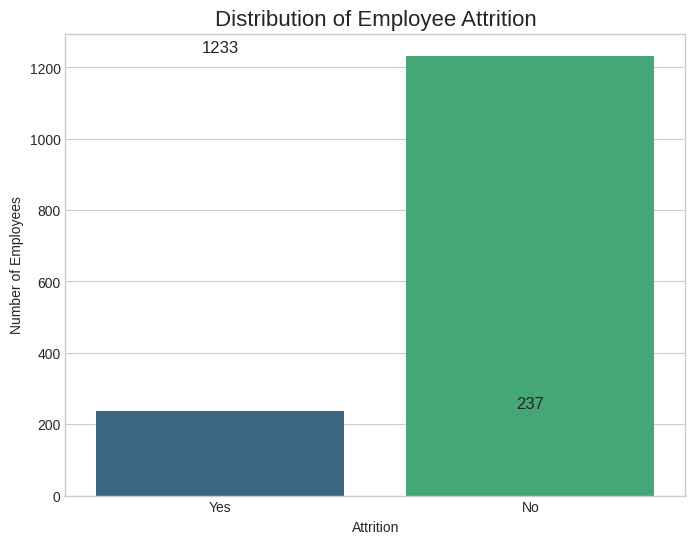

In [4]:
# --- 타겟 변수(Attrition) 분포 확인 ---
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df, palette='viridis')
plt.title('Distribution of Employee Attrition', fontsize=16)
plt.ylabel('Number of Employees')
# 각 막대에 수치 표시
for index, value in enumerate(df['Attrition'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)
plt.show()

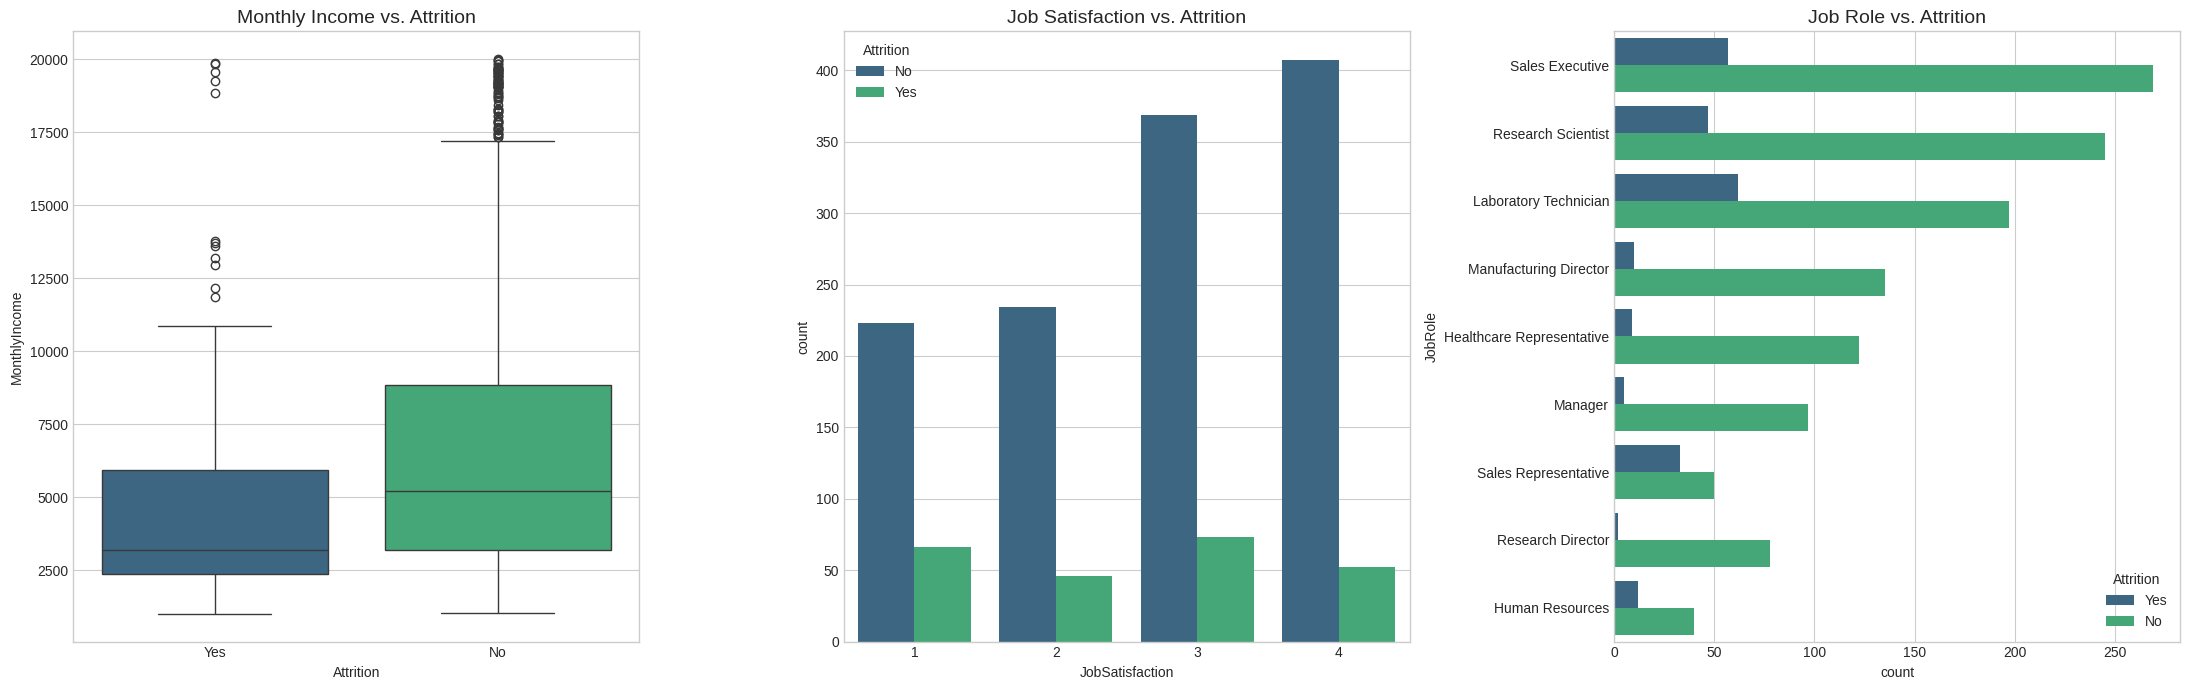

In [5]:
# --- 주요 변수와 이직의 관계 시각화 ---
fig, axes = plt.subplots(1, 3, figsize=(22, 7))

# 1. 월급과 이직 여부
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Monthly Income vs. Attrition', fontsize=14)

# 2. 직무 만족도와 이직 여부
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Job Satisfaction vs. Attrition', fontsize=14)

# 3. 직무와 이직 여부
sns.countplot(y='JobRole', hue='Attrition', data=df, ax=axes[2], palette='viridis')
axes[2].set_title('Job Role vs. Attrition', fontsize=14)

plt.tight_layout()
plt.show()

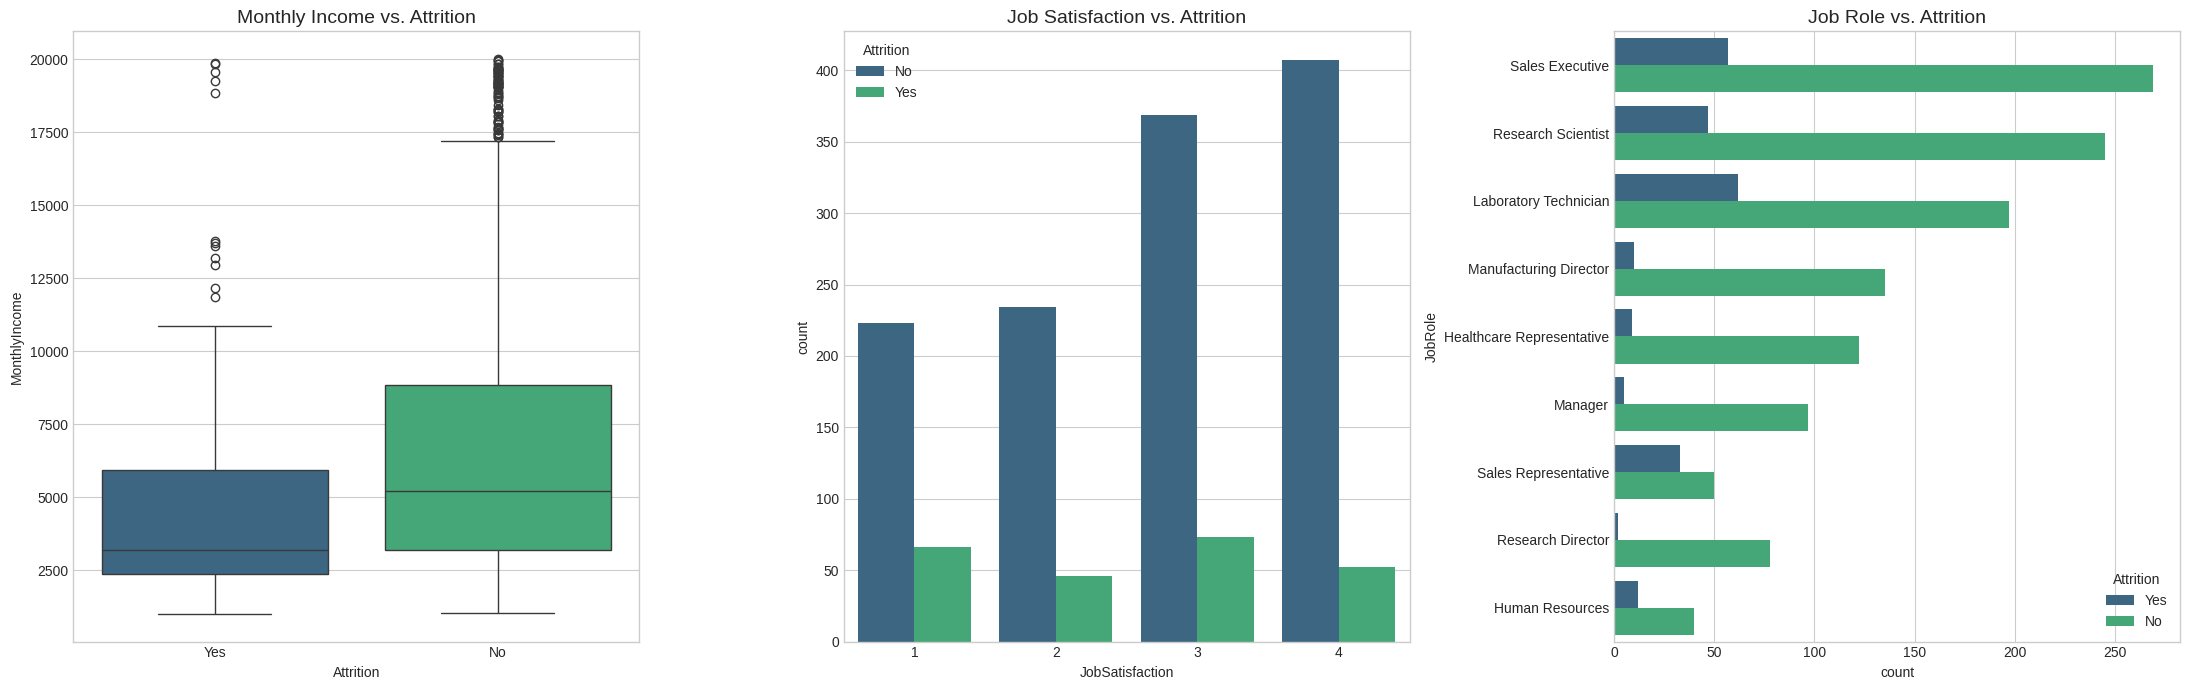

In [6]:
# --- 주요 변수와 이직의 관계 시각화 ---
fig, axes = plt.subplots(1, 3, figsize=(22, 7))

# 1. 월급과 이직 여부
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Monthly Income vs. Attrition', fontsize=14)

# 2. 직무 만족도와 이직 여부
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Job Satisfaction vs. Attrition', fontsize=14)

# 3. 직무와 이직 여부
sns.countplot(y='JobRole', hue='Attrition', data=df, ax=axes[2], palette='viridis')
axes[2].set_title('Job Role vs. Attrition', fontsize=14)

plt.tight_layout()
plt.show()

In [7]:
# --- 1. 불필요한 변수 및 타겟 변수 분리 ---
df_processed = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
df_processed['Attrition'] = df_processed['Attrition'].map({'Yes': 1, 'No': 0})

X = df_processed.drop('Attrition', axis=1)
y = df_processed['Attrition']

# --- 2. 숫자형/범주형 변수 컬럼명 정의 ---
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

print(f"숫자형 변수 ({len(numerical_features)}개): {numerical_features}")
print(f"범주형 변수 ({len(categorical_features)}개): {categorical_features}")

# --- 3. 전처리 파이프라인 구축 ---
# 숫자형 변수는 StandardScaler를 통해 스케일링
numeric_transformer = StandardScaler()
# 범주형 변수는 OneHotEncoder를 통해 인코딩 (dummy variable trap 방지)
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

# ColumnTransformer를 사용하여 각 변수 타입에 맞는 전처리 파이프라인 지정
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# --- 4. 데이터 분할 및 전처리 적용 ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 훈련 데이터에 파이프라인 fitting 및 transform
X_train = preprocessor.fit_transform(X_train)
# 테스트 데이터에는 transform만 적용
X_test = preprocessor.transform(X_test)

print("\n전처리 후 데이터 형태:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

숫자형 변수 (23개): ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
범주형 변수 (7개): ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

전처리 후 데이터 형태:
X_train: (1176, 44)
X_test: (294, 44)


In [9]:
# --- 1. ANN 모델 생성 함수 ---
def create_ann_model(input_dim):
    """Keras Sequential API를 사용하여 ANN 모델을 생성합니다."""
    model = Sequential([
        # Input Layer & 1st Hidden Layer
        Dense(units=32, activation='relu', input_dim=input_dim, kernel_initializer='he_uniform'),
        Dropout(0.3),
        # 2nd Hidden Layer
        Dense(units=16, activation='relu', kernel_initializer='he_uniform'),
        Dropout(0.2),
        # Output Layer
        Dense(units=1, activation='sigmoid') # 이진 분류이므로 sigmoid 사용
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- 2. 모델 생성 및 요약 출력 ---
input_dim = X_train.shape[1]
classifier = create_ann_model(input_dim)
classifier.summary()

# --- 3. 모델 학습 ---
# EarlyStopping 콜백 추가: 검증 손실이 개선되지 않으면 학습 조기 종료
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = classifier.fit(
    X_train, y_train,
    validation_split=0.2, # 훈련 데이터의 일부를 검증 데이터로 사용
    batch_size=100,
    epochs=100,
    callbacks=[early_stopping],
    verbose=1 # 학습 과정 출력
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │         1,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,985 (7.75 KB)

 Trainable params: 1,985 (7.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step - accuracy: 0.6984 - loss: 0.5978 - val_accuracy: 0.8051 - val_loss: 0.5195
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7861 - loss: 0.5326 - val_accuracy: 0.8305 - val_loss: 0.4822
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7994 - loss: 0.5073 - val_accuracy: 0.8305 - val_loss: 0.4614
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8373 - loss: 0.4455 - val_accuracy: 0.8305 - val_loss: 0.4485
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8159 - loss: 0.4826 - val_accuracy: 0.8305 - val_loss: 0.4384
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8224 - loss: 0.4727 - val_accuracy: 0.8305 - val_loss: 0.4287
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8243 - loss: 0.4668 - val_accuracy: 0.8305 - val_loss: 0.4208
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8380 - loss: 0.4696 - val_accuracy: 0

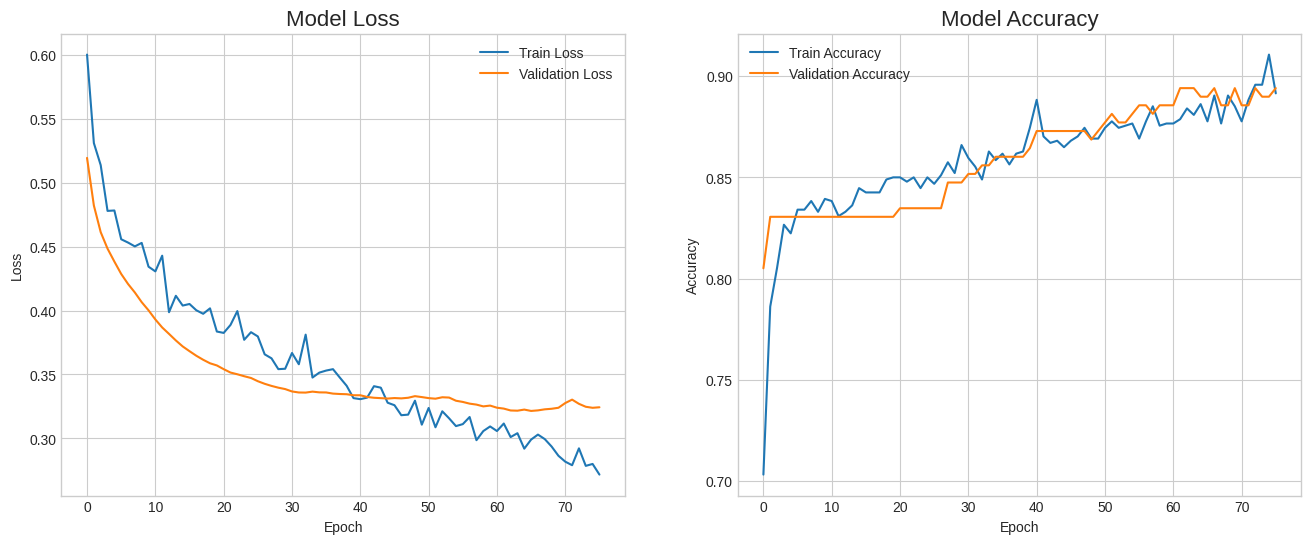

In [10]:
# --- 학습 과정 시각화 ---
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Loss-Epoch Curve
ax[0].plot(history.history['loss'], label='Train Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Model Loss', fontsize=16)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Accuracy-Epoch Curve
ax[1].plot(history.history['accuracy'], label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Model Accuracy', fontsize=16)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


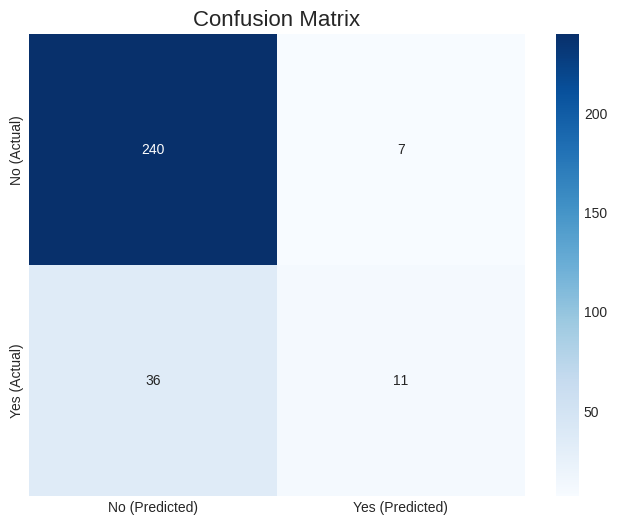

최종 모델 성능 평가:
------------------------------
정확도 (Accuracy): 0.8537
정밀도 (Precision): 0.6111
재현율 (Recall): 0.2340
F1-Score: 0.3385


In [12]:
# --- 테스트 데이터 예측 및 혼동 행렬 시각화 ---
y_pred_proba = classifier.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No (Predicted)', 'Yes (Predicted)'],
            yticklabels=['No (Actual)', 'Yes (Actual)'])
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# --- 다각적 성능 지표 계산 및 출력 ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("최종 모델 성능 평가:")
print("-" * 30)
print(f"정확도 (Accuracy): {accuracy:.4f}")
print(f"정밀도 (Precision): {precision:.4f}")
print(f"재현율 (Recall): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")